In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('Leena_df1Clean.csv')

In [32]:
df['Admission grade'].value_counts()

Admission grade
130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
150.6      1
184.4      1
102.6      1
147.3      1
156.2      1
Name: count, Length: 620, dtype: int64

# Kolmogorov-Smirnov Test

array([[<Axes: title={'center': 'Admission grade'}>]], dtype=object)

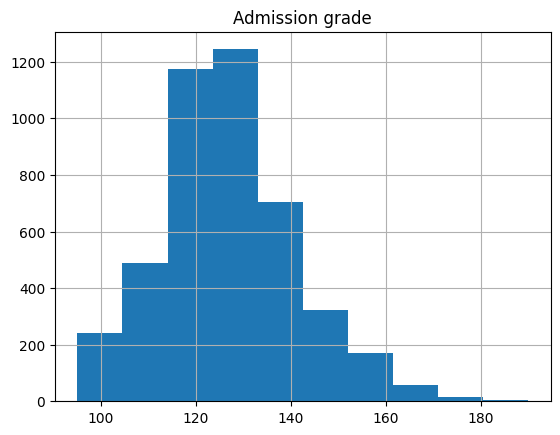

In [33]:
df.hist(column='Admission grade')

array([[<Axes: title={'center': 'Curricular units 1st sem (grade)'}>]],
      dtype=object)

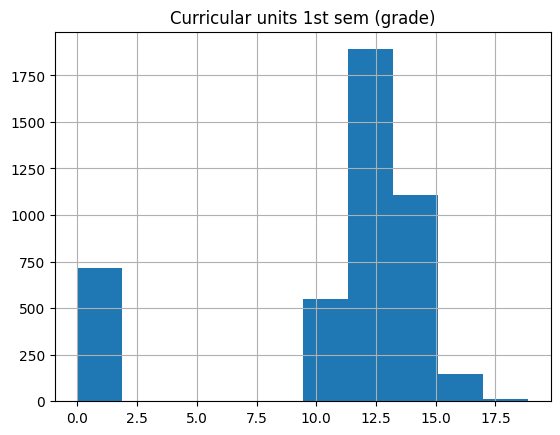

In [34]:
df.hist(column='Curricular units 1st sem (grade)')

array([[<Axes: title={'center': 'Curricular units 2nd sem (grade)'}>]],
      dtype=object)

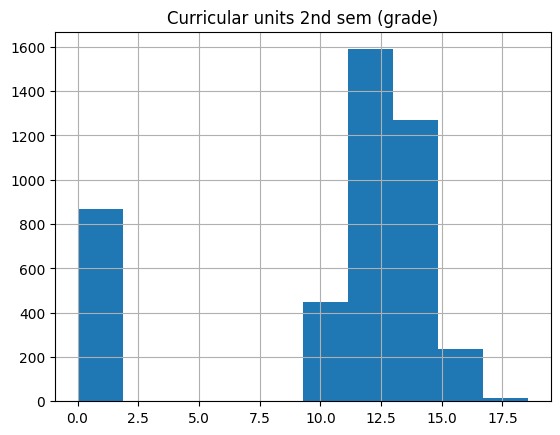

In [35]:
df.hist(column='Curricular units 2nd sem (grade)')

/var/folders/jz/9_xh9kgd079c6v8py7vvz7hr0000gn/T/ipykernel_86133/3560483435.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sem1 = df[df['Curricular units 1st sem (grade)'] != 0.0][df['Target'] != 'Dropout']


array([[<Axes: title={'center': 'Curricular units 1st sem (grade)'}>]],
      dtype=object)

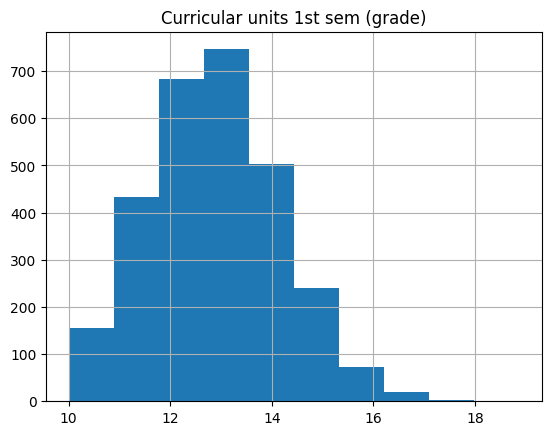

In [42]:
sem1 = df[df['Curricular units 1st sem (grade)'] != 0.0][df['Target'] != 'Dropout']
sem1.hist(column='Curricular units 1st sem (grade)')

/var/folders/jz/9_xh9kgd079c6v8py7vvz7hr0000gn/T/ipykernel_86133/3664039686.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sem1do = df[df['Curricular units 1st sem (grade)'] != 0.0][df['Target'] == 'Dropout']


array([[<Axes: title={'center': 'Curricular units 1st sem (grade)'}>]],
      dtype=object)

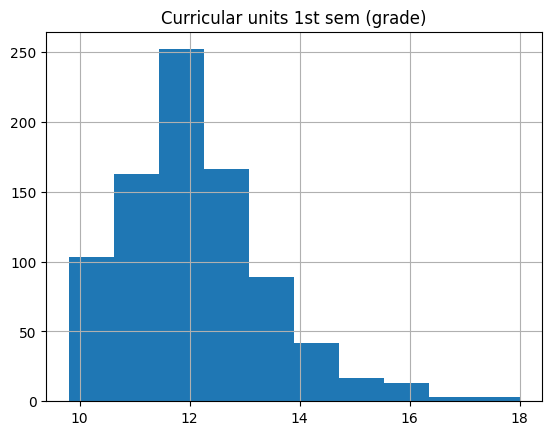

In [43]:
sem1do = df[df['Curricular units 1st sem (grade)'] != 0.0][df['Target'] == 'Dropout']
sem1do.hist(column='Curricular units 1st sem (grade)')

/var/folders/jz/9_xh9kgd079c6v8py7vvz7hr0000gn/T/ipykernel_86133/2929114567.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sem2 = df[df['Curricular units 2nd sem (grade)'] != 0.0][df['Target'] != 'Dropout']


array([[<Axes: title={'center': 'Curricular units 2nd sem (grade)'}>]],
      dtype=object)

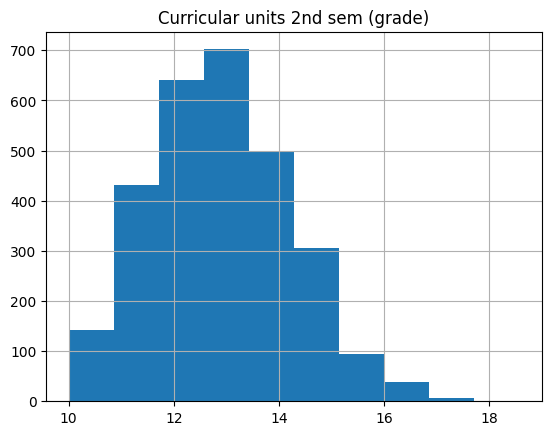

In [44]:
sem2 = df[df['Curricular units 2nd sem (grade)'] != 0.0][df['Target'] != 'Dropout']
sem2.hist(column='Curricular units 2nd sem (grade)')

/var/folders/jz/9_xh9kgd079c6v8py7vvz7hr0000gn/T/ipykernel_86133/3490391991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sem2do = df[df['Curricular units 2nd sem (grade)'] != 0.0][df['Target'] == 'Dropout']


array([[<Axes: title={'center': 'Curricular units 2nd sem (grade)'}>]],
      dtype=object)

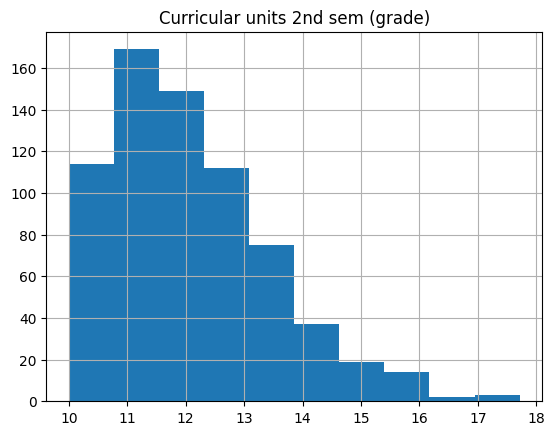

In [45]:
sem2do = df[df['Curricular units 2nd sem (grade)'] != 0.0][df['Target'] == 'Dropout']
sem2do.hist(column='Curricular units 2nd sem (grade)')

<Axes: xlabel='Admission grade', ylabel='Curricular units 1st sem (grade)'>

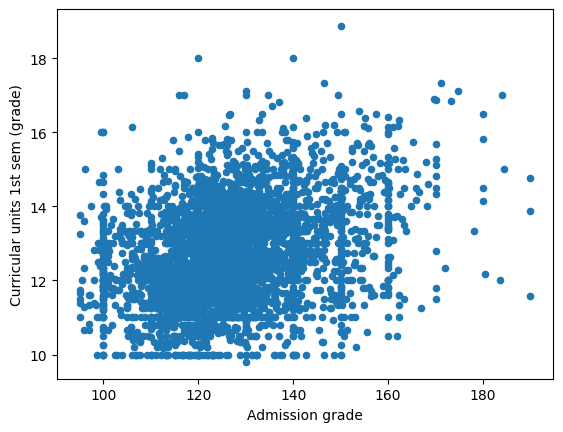

In [38]:
sem1.plot.scatter(y='Curricular units 1st sem (grade)', x='Admission grade')

<Axes: xlabel='Admission grade', ylabel='Curricular units 2nd sem (grade)'>

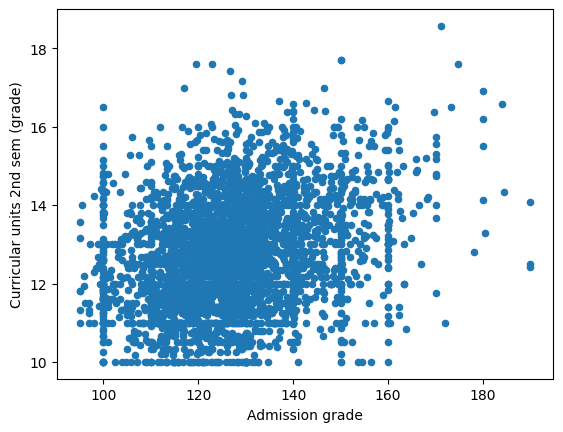

In [39]:
sem2.plot.scatter(y='Curricular units 2nd sem (grade)', x='Admission grade')

In [64]:
def regression(x, y, color):    
    n = len(x)

    X = np.column_stack((np.ones(n), x))

    XtX = np.array([
        [ n,        x.sum() ],
        [ x.sum(), (x**2).sum() ]
    ])

    X.T.dot(X), XtX
    b0, b1 = np.linalg.inv(X.T.dot(X))\
        .dot(X.T).dot(y)
    plt.plot(x, b0 + b1*x, color = color)


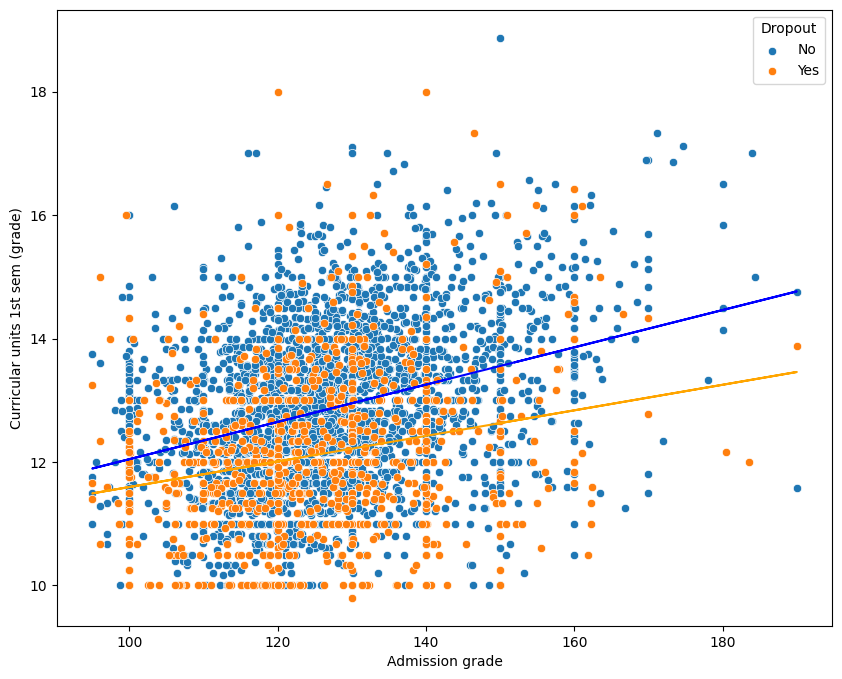

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(data=sem1, x='Admission grade', y='Curricular units 1st sem (grade)', 
               ax=ax)
sns.scatterplot(data=sem1do, x='Admission grade', y='Curricular units 1st sem (grade)', 
               ax=ax)
regression(sem1['Admission grade'], sem1['Curricular units 1st sem (grade)'], 'blue')
regression(sem1do['Admission grade'], sem1do['Curricular units 1st sem (grade)'], 'orange')
plt.legend(title='Dropout', labels=['No', 'Yes'])
plt.show()

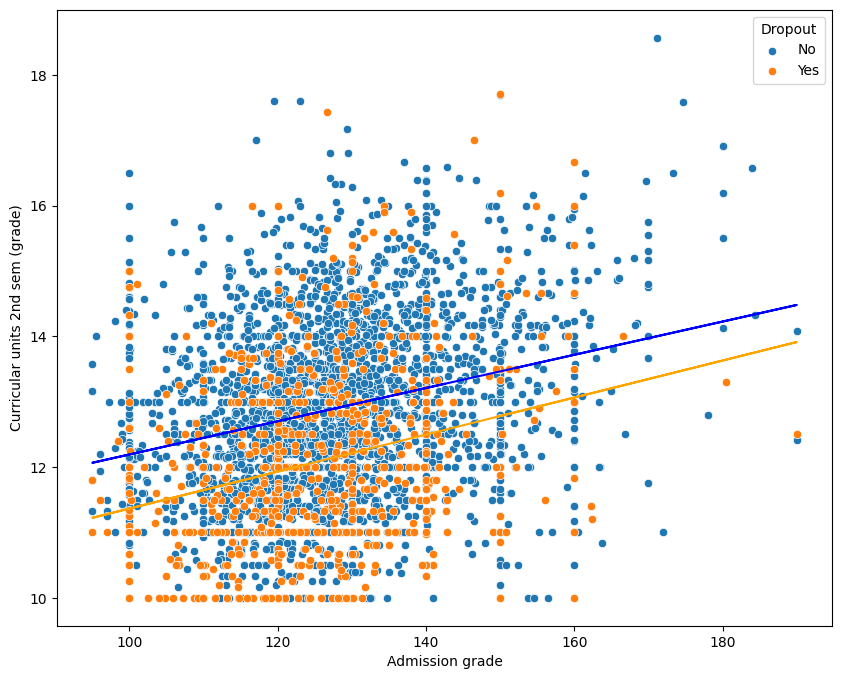

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(data=sem2, x='Admission grade', y='Curricular units 2nd sem (grade)', 
               ax=ax)
sns.scatterplot(data=sem2do, x='Admission grade', y='Curricular units 2nd sem (grade)', 
               ax=ax)
regression(sem2['Admission grade'], sem2['Curricular units 2nd sem (grade)'], 'blue')
regression(sem2do['Admission grade'], sem2do['Curricular units 2nd sem (grade)'], 'orange')
plt.legend(title='Dropout', labels=['No', 'Yes'])
plt.show()